<a href="https://colab.research.google.com/github/SteevAbrahamThomas/new-test/blob/main/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent.
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

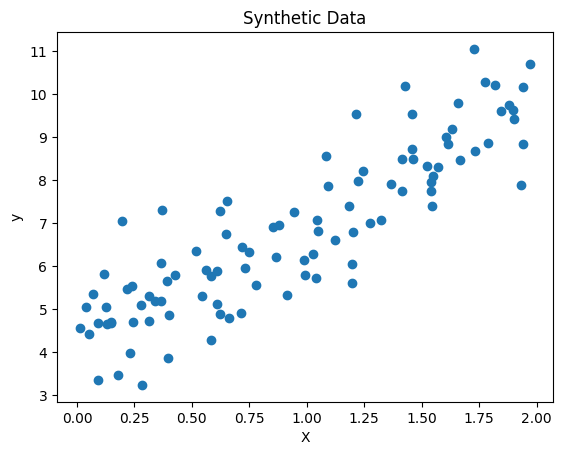

In [70]:

# import numpy as np
# import matplotlib.pyplot as plt

# # Set seed for reproducibility
# np.random.seed(42)

# # Generate synthetic data
# X = 2 * np.random.rand(100, 1)
# y = 4 + 3 * X + np.random.randn(100, 1)

# # Plot
# plt.scatter(X, y)
# plt.xlabel("X")
# plt.ylabel("y")
# plt.title("Synthetic Data")
# plt.show()
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()

## Do Train-Test Split (75%-25%)

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (75, 1)
Shape of y_train: (75, 1)
Shape of X_test: (25, 1)
Shape of y_test: (25, 1)


## Do the Linear Regression with Scikit-Learn Library

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

print("--- Scikit-Learn Linear Regression Results ---")
print(f"R2 Score: {r2_lr:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lr:.4f}")
print(f"Learned Coefficient (Slope): {lr_model.coef_[0][0]:.4f}")
print(f"Learned Intercept: {lr_model.intercept_[0]:.4f}")

--- Scikit-Learn Linear Regression Results ---
R2 Score: 0.8311
Mean Absolute Percentage Error (MAPE): 0.0848
Learned Coefficient (Slope): 2.7259
Learned Intercept: 4.1688


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [73]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# --- Ridge Regression ---
ridge_model = Ridge(alpha=1.0) # alpha is the regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

# --- Lasso Regression ---
lasso_model = Lasso(alpha=0.1) # A small alpha is chosen for this simple dataset
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)

# --- Comparison Table ---
metrics_data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R2 Score': [r2_lr, r2_ridge, r2_lasso],
    'MAPE': [mape_lr, mape_ridge, mape_lasso],
    'Coefficient (m)': [lr_model.coef_[0][0], ridge_model.coef_[0], lasso_model.coef_[0]],
    'Intercept (c)': [lr_model.intercept_[0], ridge_model.intercept_, lasso_model.intercept_]
}
metrics_df = pd.DataFrame(metrics_data)
print(metrics_df.to_string())

               Model  R2 Score      MAPE  Coefficient (m)        Intercept (c)
0  Linear Regression  0.831099  0.084757         2.725873             4.168788
1   Ridge Regression  0.825999  0.082412         2.614488  [4.271018003322384]
2   Lasso Regression  0.809082  0.082640         2.406352  [4.462047779004177]


## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:

## 🧠 Custom Linear Regression Class

In [74]:
class MyLinearRegression:
    def __init__(self):
        self.m = None
        self.c = None
        self.loss_history = []

    def fit(self, X, y, lr=0.01, n_iters=1000):
        # Initialize coefficients
        self.m = 0
        self.c = 0
        n_samples = len(X)

        for _ in range(n_iters):
            # Calculate predictions
            y_pred = self.predict(X)

            # Calculate loss (MSE)
            loss = np.mean((y - y_pred)**2)
            self.loss_history.append(loss)

            # Calculate gradients
            dm = (-2/n_samples) * np.sum(X * (y - y_pred))
            dc = (-2/n_samples) * np.sum(y - y_pred)

            # Update coefficients
            self.m -= lr * dm
            self.c -= lr * dc

    def predict(self, X):
        return self.m * X + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)

## 🔁 Train the Model and Visualize the Fit

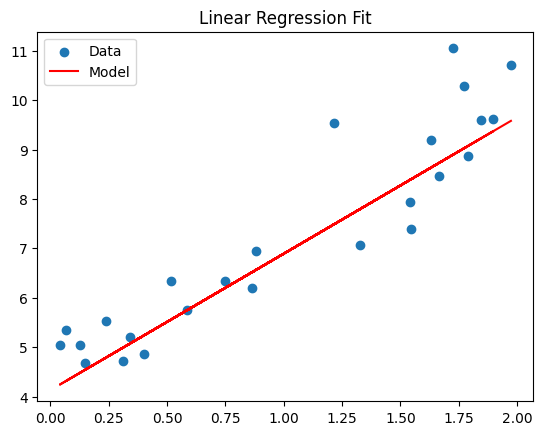

Learned coefficients (m, c): 2.760287211333097 4.131338540026423


In [75]:
model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Predictions
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Print coefficients
print("Learned coefficients (m, c):", model.m, model.c)

## 📉 Plot the Loss Curve

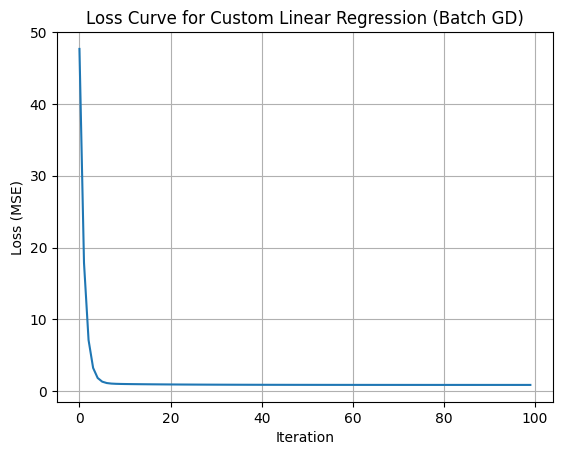

In [76]:
plt.plot(range(len(model.loss_history)), model.loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve for Custom Linear Regression (Batch GD)")
plt.grid(True)
plt.show()

## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [77]:
class MyLinearRegressionSGD:
    """
    Custom Linear Regression model using Stochastic Gradient Descent.
    """
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.loss_history = []

    def fit(self, X, y, lr=0.01, n_epochs=100):
        """
        Trains the model using SGD.
        lr: learning rate
        n_epochs: number of passes over the entire dataset
        """
        n_samples, n_features = X.shape
        y = y.ravel()

        # 1. Initialize weights
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0
        self.loss_history = []

        # 2. Loop for each epoch
        for epoch in range(n_epochs):
            # Shuffle data at the beginning of each epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Iterate over each sample
            for i in range(n_samples):
                xi = X_shuffled[i:i+1]
                yi = y_shuffled[i:i+1]

                # a. Make a prediction for a single sample
                y_pred = np.dot(xi, self.coef_) + self.intercept_

                # b. Calculate gradients for the single sample
                error = yi - y_pred
                dm = -2 * xi.T.dot(error)
                dc = -2 * np.sum(error)

                # c. Update weights
                self.coef_ -= lr * dm
                self.intercept_ -= lr * dc

            # d. Calculate and record the loss at the end of each epoch
            epoch_y_pred = self.predict(X)
            epoch_loss = np.mean((y - epoch_y_pred)**2)
            self.loss_history.append(epoch_loss)

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

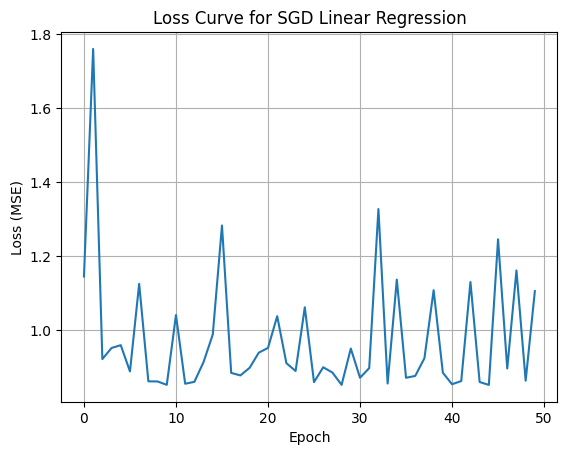

In [78]:
# Train the SGD model
sgd_model = MyLinearRegressionSGD()
# A smaller learning rate and fewer epochs are often used for SGD
sgd_model.fit(X_train, y_train, lr=0.05, n_epochs=50)

# Plot loss curve while using Stochastic Gradient Descent
plt.plot(range(len(sgd_model.loss_history)), sgd_model.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve for SGD Linear Regression")
plt.grid(True)
plt.show()

## Visualize the prediction result of Library version and Custom regression code created

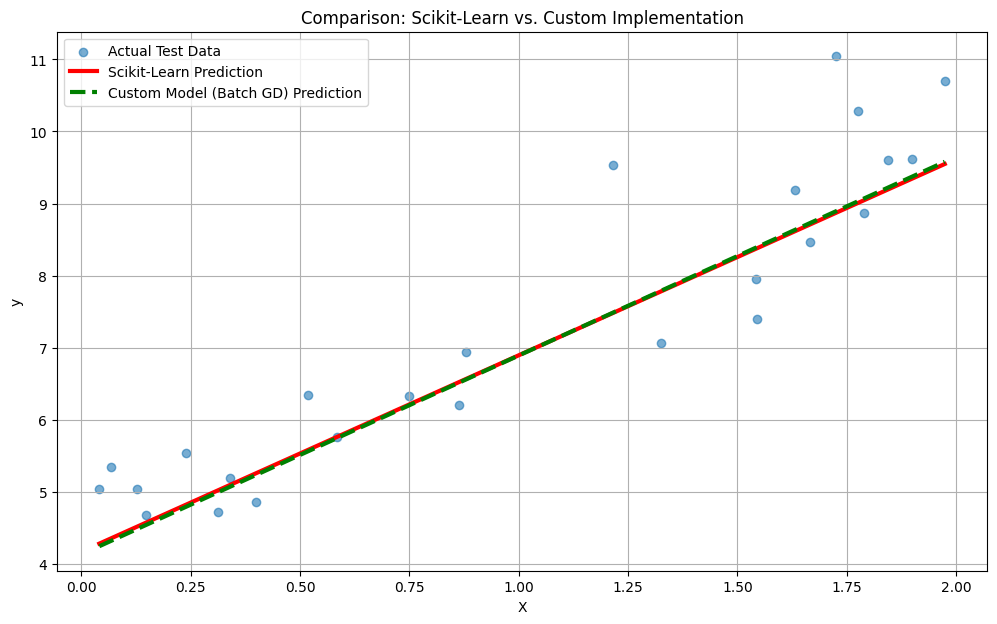

In [79]:
# Get predictions from both models on the test set
y_pred_lr = lr_model.predict(X_test)
y_pred_custom = model.predict(X_test)

# Sort test data for clean line plots
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
y_test_sorted = y_test[sorted_indices]
y_pred_lr_sorted = y_pred_lr[sorted_indices]
y_pred_custom_sorted = y_pred_custom[sorted_indices]

# Create the plot
plt.figure(figsize=(12, 7))
plt.scatter(X_test, y_test, label="Actual Test Data", alpha=0.6)
plt.plot(X_test_sorted, y_pred_lr_sorted, color='red', linewidth=3, label="Scikit-Learn Prediction")
plt.plot(X_test_sorted, y_pred_custom_sorted, color='green', linestyle='--', linewidth=3, label="Custom Model (Batch GD) Prediction")

plt.title("Comparison: Scikit-Learn vs. Custom Implementation")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## ✅ Checklist
- [ ] Did linear regression using scikit-learn API
- [ ] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [ ] Derived gradients using chain rule
- [ ] Implemented custom Linear Regression class
- [ ] Trained using gradient descent
- [ ] Visualized predictions and loss
- [ ] Implemented stochastic gradient descent (bonus)
- [ ] Visualized predictions and loss for stochastic gradient descent (bonus)
- [ ] Visualize the prediction result of Library version and custom version